经验模态分解（Empirical Mode Decomposition，EMD）方法是一种自适应信号时频处理方法，特别适用于非线性、非平稳信号的分析处理[1]。其本质是一种对信号进行分解的方法,将信号分解为各个相互独立的成分的叠加,依据数据自身的时间尺度特征来进行信号分解，具备自适应性。EMD的优点在于它是一种自适应的、数据驱动的分解方法，不需要预先假设信号的分布或结构。这使得它适用于处理各种类型的信号，包括非线性和非平稳信号。

EMD 认为任何一个复杂序列都是由多个单频率信号叠加而成，因此可以分解成若干个 本征模态函数（Intrinsic Mode Functions, IMF），IMF 的各个分量即代表了原始信号中的各频 率分量，并按照从高频到低频的顺序依次排列，这也是 IMF 的物理含义[2]。

pip install EMD-signal

from PyEMD import EMD

In [5]:
#base tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import requests

#var
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

#协整分析
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#VECM分析
from statsmodels.tsa.vector_ar.vecm import coint_johansen,VECM

#格兰杰因果检验
from statsmodels.tsa.stattools import grangercausalitytests

warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv("data/0414algorithmall.csv")

In [52]:
data.iloc[:,[i for i in range(16)]].describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.160882,0.396634,0.404381,0.948580,0.167236,0.095761,0.057267,0.362671,0.085146,0.092785,0.185824,0.278862,0.088201,0.532109,0.061556,0.151205
std,0.099621,0.057005,0.121899,0.024678,0.116935,0.072572,0.062324,0.274961,0.062100,0.077085,0.265472,0.460371,0.123806,0.720655,0.052046,0.093504
min,0.062241,0.338877,0.310979,0.916706,0.080454,0.025025,0.005153,0.102557,0.028887,0.018652,0.020939,0.022466,0.011608,0.033821,0.010360,0.051065
25%,0.086472,0.353588,0.321069,0.928437,0.088783,0.038013,0.009613,0.134312,0.044498,0.029146,0.029930,0.029922,0.014615,0.047570,0.021064,0.071410
50%,0.119738,0.372592,0.348049,0.942153,0.112439,0.065280,0.028887,0.225613,0.057851,0.062792,0.066646,0.066945,0.029146,0.151209,0.040386,0.118820
75%,0.229476,0.438360,0.439703,0.966395,0.193995,0.151532,0.085177,0.590989,0.110329,0.134469,0.200128,0.270277,0.095627,0.690466,0.088204,0.204529
max,0.459729,0.569918,0.830209,1.026720,0.574779,0.282806,0.248400,1.059330,0.299905,0.315350,1.094448,1.874390,0.539271,2.596140,0.212911,0.413876


In [11]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

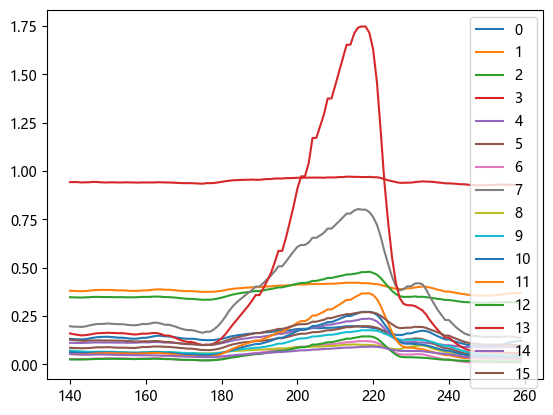

In [53]:
for i in range(16):
    plt.plot(data.iloc[[j for j in range(140,260)],i],label=i)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


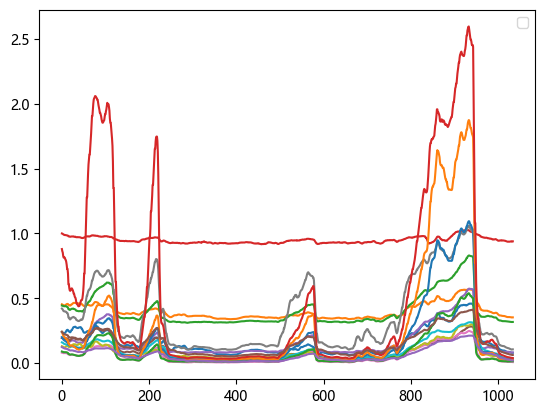

In [38]:
for i in range(16):
    plt.plot(data.iloc[:,i])
plt.legend()
plt.show()

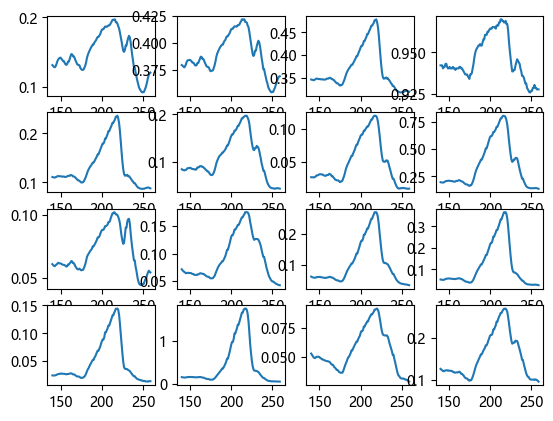

In [25]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(data.iloc[[j for j in range(140,260)],i])
plt.show()

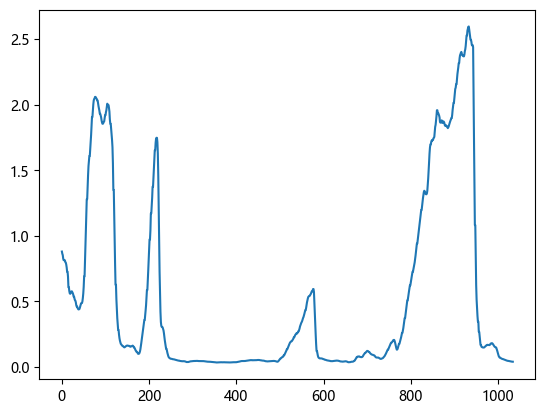

In [37]:
plt.plot(data.iloc[:,13])

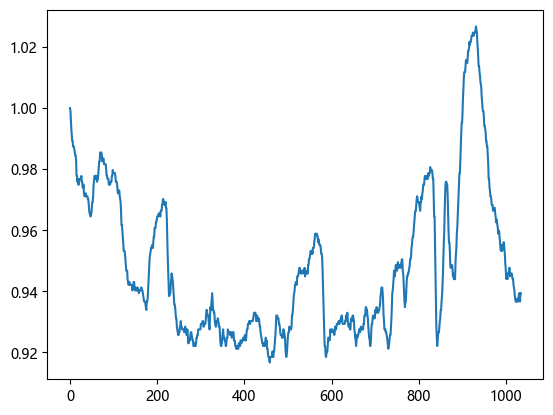

In [35]:
plt.plot(data.iloc[:,3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


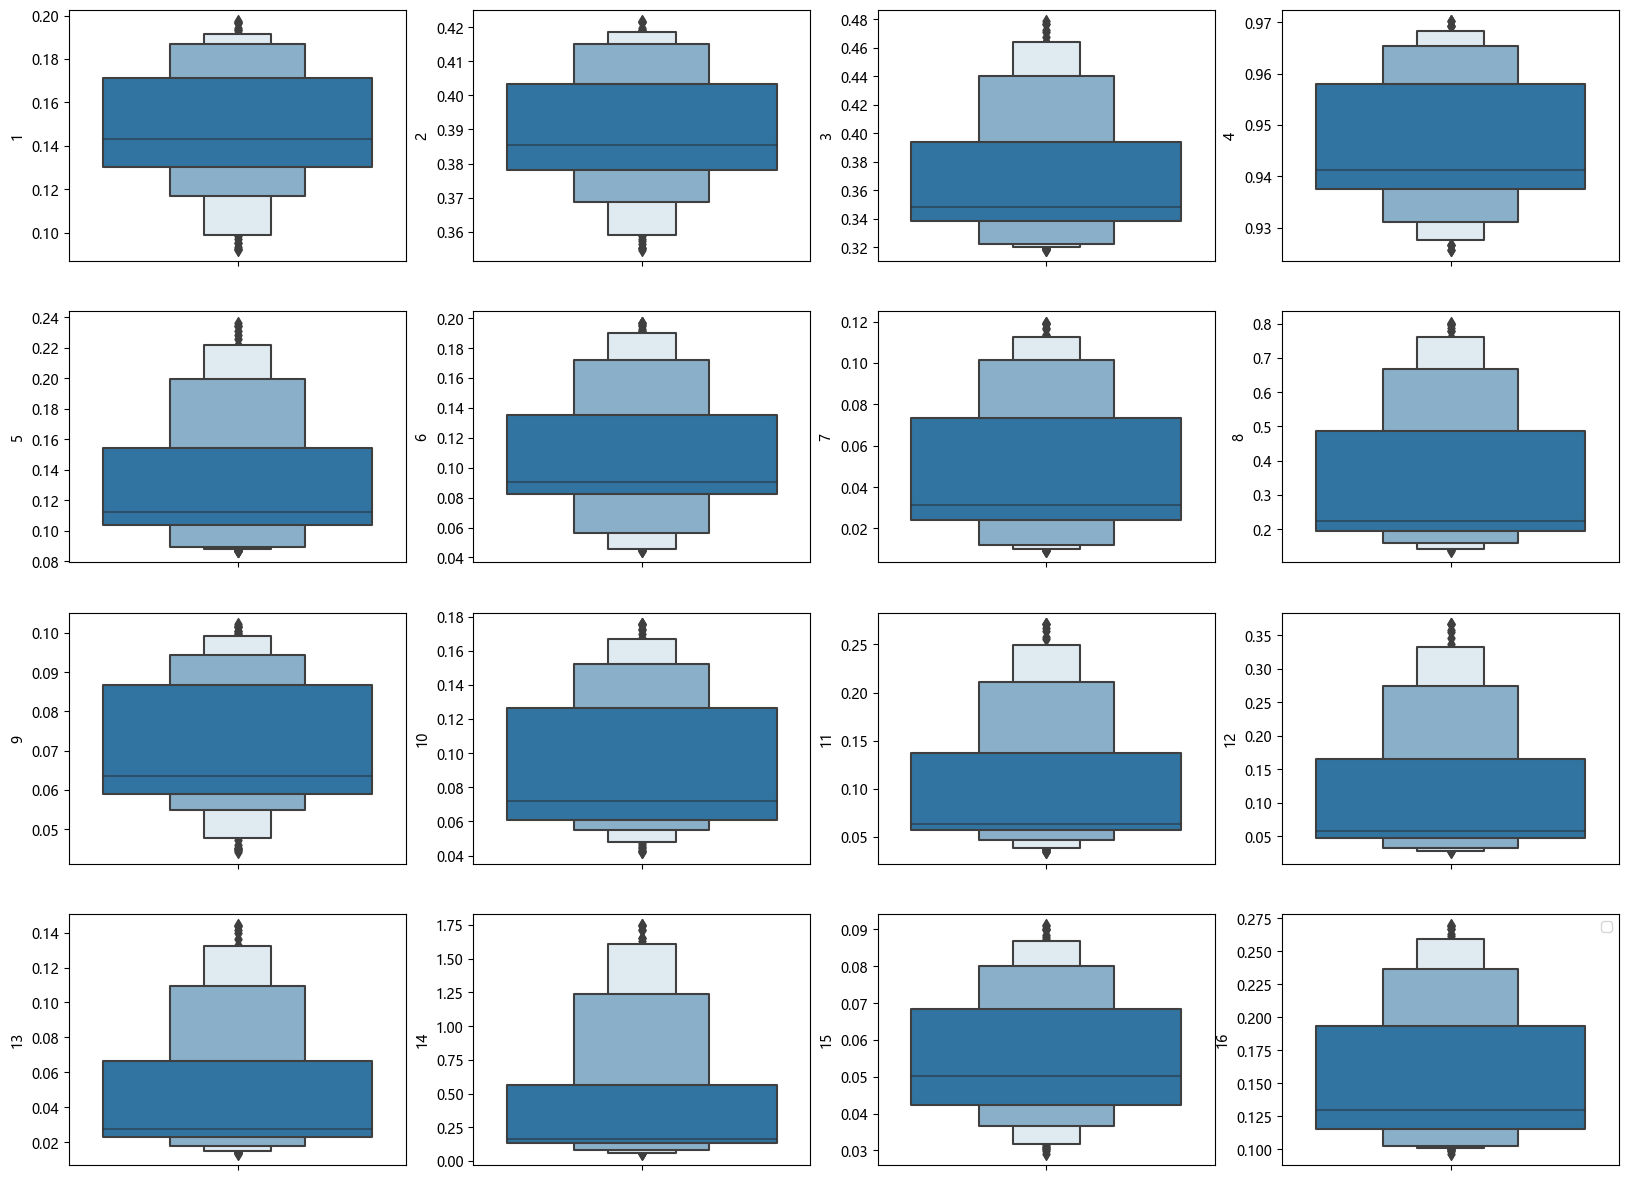

In [33]:
plt.figure(figsize=(20,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxenplot(y=data.iloc[[j for j in range(140,260)],i])
plt.legend()
plt.show()

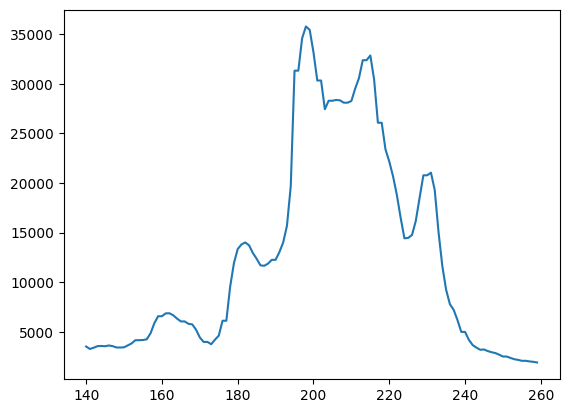

In [16]:
plt.plot(data.CO[140:260])

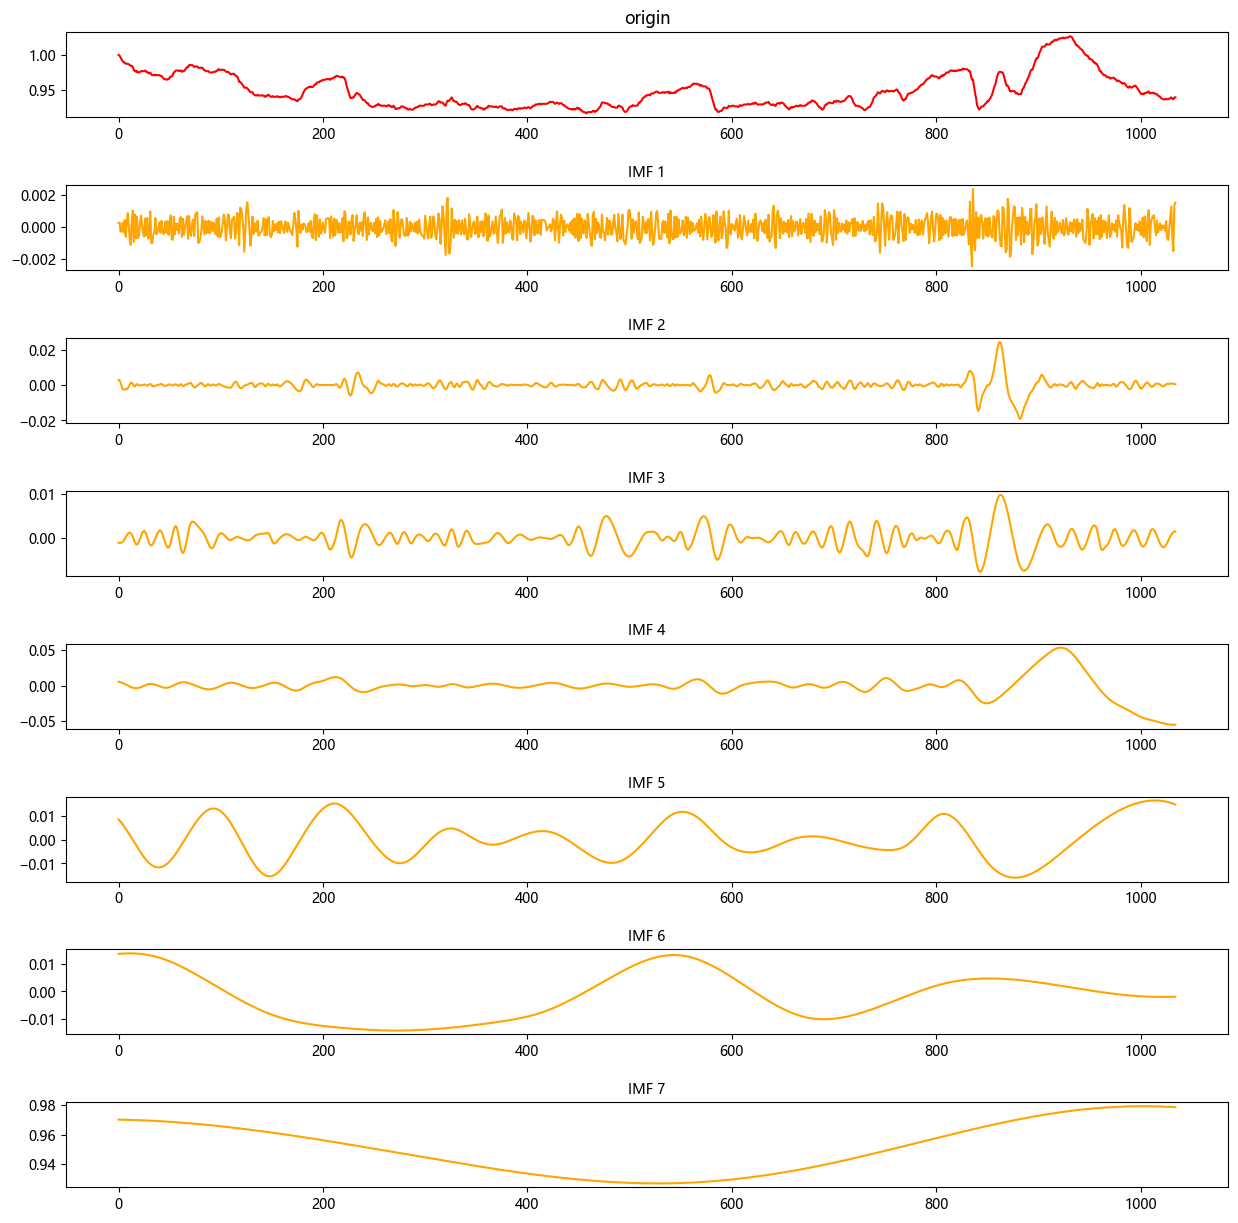

In [43]:
from PyEMD import EMD

plt.rc("font", family='Microsoft YaHei')
# 创建 EMD 对象
emd = EMD()
# 对信号进行经验模态分解
codata = np.array(data.iloc[:,3].tolist())
IMFs = emd(codata)

# 可视化
plt.figure(figsize=(15,15))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(codata, 'r')
plt.title("origin")

for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(imf, color='orange')
    plt.title("IMF "+str(num+1), fontsize=10)
# 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.show()

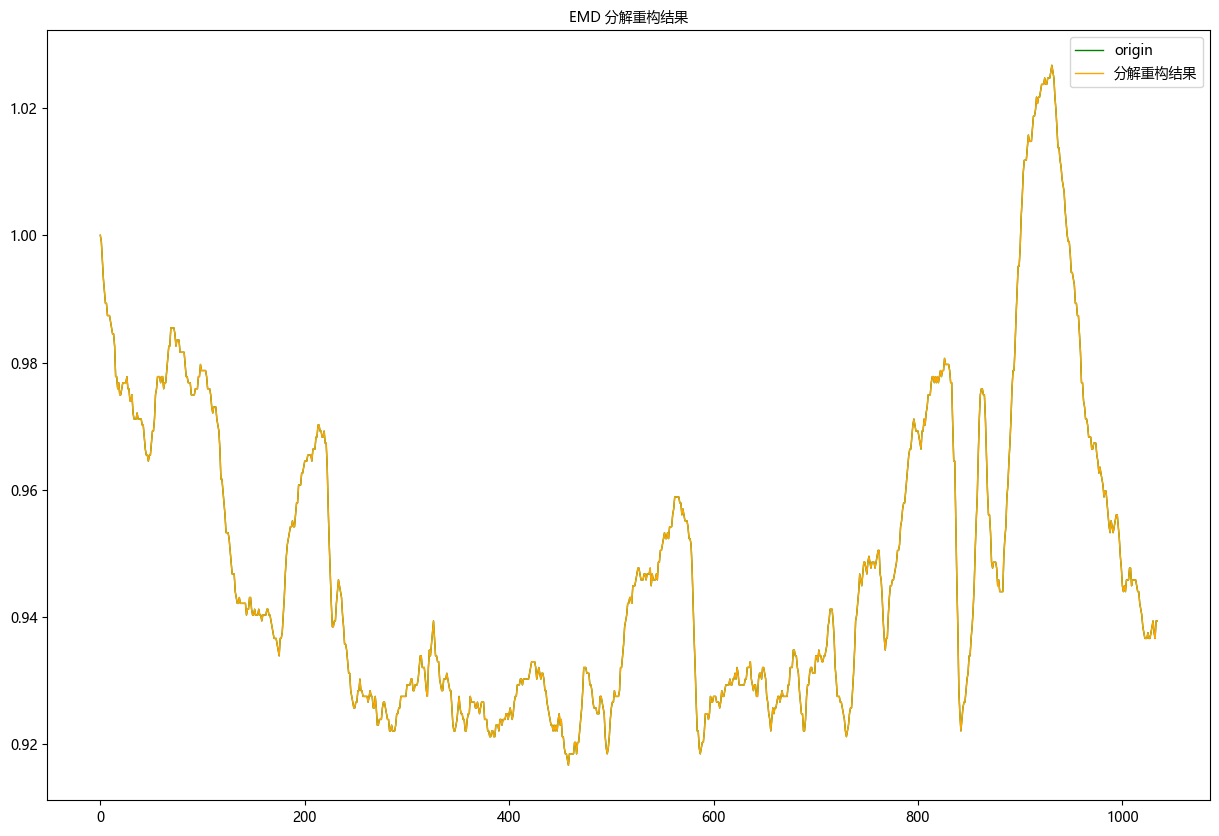

In [54]:
# 分量重构
reconstructed_data = np.sum(IMFs, 0) # 沿ｙ轴方向求和

plt.figure(figsize=(15,10))
plt.plot(codata, linewidth=1, color='green', label='origin')
plt.plot(reconstructed_data, linewidth=1, color='orange', label='分解重构结果')
plt.title("EMD 分解重构结果", fontsize=10, loc='center')
plt.xticks(fontsize=10) # x 轴刻度字体大小
plt.yticks(fontsize=10) # y 轴刻度字体大小
plt.legend(loc='upper right') # 绘制曲线图例，信息来自类型 label
plt.show()